None
w[0]: 0.393906  b: -0.031804


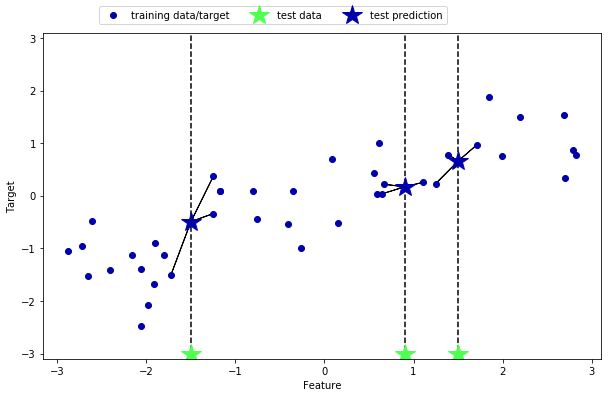

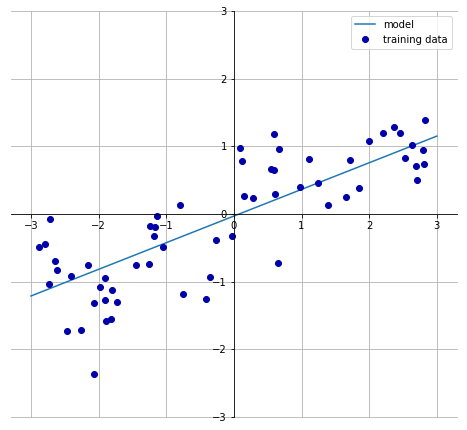

lr.coef_: [ 0.39390555]
lr.intercept_: -0.0318043430268
------------------RIDGE-----------------------------
training set score: 0.670060
test set score: 0.657795
alpha=10:
training set score: 0.667496
test set score: 0.643293
alpha=0.1:
training set score: 0.670089
test set score: 0.659183


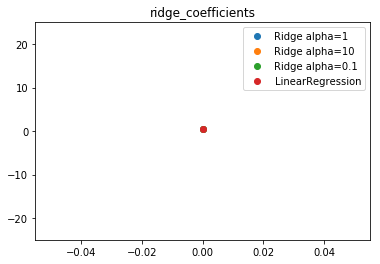

training set score: 0.670089
test set score: 0.659335
number of features used: 1
--------------LOGISTIC REGRESSION--------
training set score: 0.955399
test set score: 0.958042
 
Logistic Regression, C=0.01
training set score: 0.934272
test set score: 0.930070
 
Logistic Regression, C=0.01
training set score: 0.934272
test set score: 0.930070


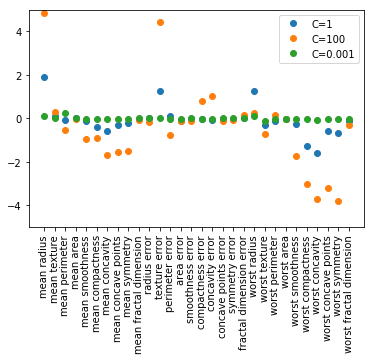

training accuracy of L1 logreg with C=0.001000: 0.913146
test accuracy of L1 logreg with C=0.001000: 0.923077
training accuracy of L1 logreg with C=1.000000: 0.960094
test accuracy of L1 logreg with C=1.000000: 0.958042
training accuracy of L1 logreg with C=100.000000: 0.985915
test accuracy of L1 logreg with C=100.000000: 0.979021


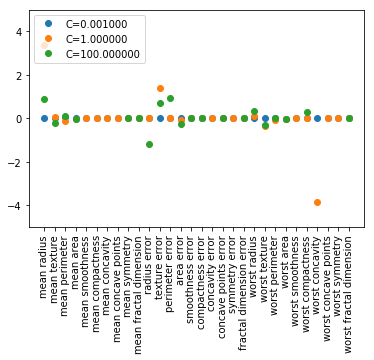

accuracy on training set: 0.988263
accuracy on test set: 0.951049
---------------GradientBoostingClassifier-----
accuracy on training set: 0.988263
accuracy on test set: 0.958042


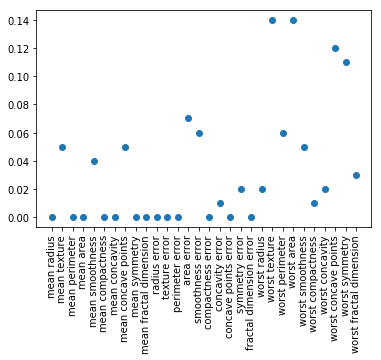

------------SVC-----------
accuracy on training set: 1.000000
accuracy on test set: 0.629371


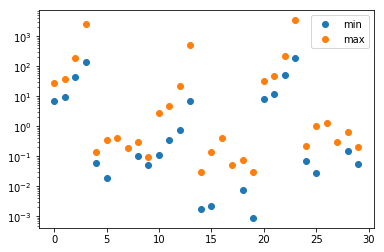

-------------SVC SCALING---------
Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
accuracy on training set: 0.988263
accuracy on test set: 0.986014
-----------NEURAL NETWORK--------
accuracy on training set: 0.206573
accuracy on test set: 0.153846


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy on training set: 0.992958
accuracy on test set: 0.965035
accuracy on training set: 0.988263
accuracy on test set: 0.986014


In [2]:
import mglearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target,random_state=66)
training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

from sklearn.neighbors import KNeighborsRegressor

X, y=mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

reg.predict(X_test)
reg.score(X_test, y_test)

print (mglearn.plots.plot_knn_regression(n_neighbors=3))

mglearn.plots.plot_linear_regression_wave()
plt.show()

from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: %s" % lr.coef_)
print("lr.intercept_: %s" % lr.intercept_)
print('------------------RIDGE-----------------------------')
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print ("alpha=10:")
print("training set score: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print ("alpha=0.1:")
print("training set score: %f" % ridge01.score(X_train, y_train))
print("test set score: %f" % ridge01.score(X_test, y_test))

plt.title("ridge_coefficients")
plt.plot(ridge.coef_, 'o', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'o', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.ylim(-25, 25)
plt.legend()
plt.show()

from sklearn import linear_model
from sklearn.linear_model import Lasso
lasso =linear_model.Lasso(alpha=0.00001)
lasso.fit(X_train, y_train)
print("training set score: %f" % lasso.score(X_train, y_train))
print("test set score: %f" % lasso.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso.coef_ != 0))


print("--------------LOGISTIC REGRESSION--------")
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logisticregression=LogisticRegression().fit(X_train,y_train)
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))
print (" ")

logisticregression001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Logistic Regression, C=0.01")
print("training set score: %f" % logisticregression001.score(X_train, y_train))
print("test set score: %f" % logisticregression001.score(X_test, y_test))
print(" ")

logisticregression100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Logistic Regression, C=0.01")
print("training set score: %f" % logisticregression001.score(X_train, y_train))
print("test set score: %f" % logisticregression001.score(X_test, y_test))

plt.plot(logisticregression.coef_.T, 'o', label="C=1")
plt.plot(logisticregression100.coef_.T, 'o', label="C=100")
plt.plot(logisticregression001.coef_.T, 'o', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend()
plt.show()
for C in [0.001, 1, 100]:
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("training accuracy of L1 logreg with C=%f: %f"
            % (C, lr_l1.score(X_train, y_train)))
    print("test accuracy of L1 logreg with C=%f: %f"
            % (C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, 'o', label="C=%f" % C)
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    plt.ylim(-5, 5)
plt.legend(loc=2)
plt.show()

from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=4, random_state=0) #only 4 questions can be asked
tree.fit(X_train,y_train)
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

print("---------------GradientBoostingClassifier-----")

from sklearn.ensemble import GradientBoostingClassifier
gbrt=GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

plt.plot(gbrt.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.show()

print ("------------SVC-----------")

from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
print("accuracy on training set: %f" % svc.score(X_train, y_train))
print("accuracy on test set: %f" % svc.score(X_test, y_test))

plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), 'o', label="max")
plt.legend(loc="best")
plt.yscale("log")
plt.show()

print ("-------------SVC SCALING---------")
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, divide by range
# afterwards min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n%s" % X_train_scaled.min(axis=0))
print("Maximum for each feature\n %s" % X_train_scaled.max(axis=0))

# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % svc.score(X_test_scaled, y_test))

print("-----------NEURAL NETWORK--------")
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print("accuracy on training set: %f" % mlp.score(X_train, y_train))
print("accuracy on test set: %f" % mlp.score(X_test, y_test))

# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, scale by inverse standard deviation
# afterwards, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

mlp = MLPClassifier(max_iter=200, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))



In [8]:
print ("-------Data Scaling------")
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train) #only the training data, not the target data, is fit
# don't print using scientific notation
np.set_printoptions(suppress=True, precision=2)
# transform data
X_train_scaled = scaler.transform(X_train)
# print data set properties before and after scaling
print("transformed shape: %s" % (X_train_scaled.shape,))
print("per-feature minimum before scaling:\n %s" % X_train.min(axis=0))
print("per-feature maximum before scaling:\n %s" % X_train.max(axis=0))
print("per-feature minimum after scaling:\n %s" % X_train_scaled.min(axis=0))
print("per-feature maximum after scaling:\n %s" % X_train_scaled.max(axis=0))
print(" ")
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling: %s" % X_test_scaled.min(axis=0))
print("per-feature maximum after scaling: %s" % X_test_scaled.max(axis=0))



-------Data Scaling------
transformed shape: (426, 30)
per-feature minimum before scaling:
 [   6.98    9.71   43.79  143.5     0.05    0.02    0.      0.      0.11
    0.05    0.12    0.36    0.76    6.8     0.      0.      0.      0.
    0.01    0.      7.93   12.02   50.41  185.2     0.07    0.03    0.
    0.      0.16    0.06]
per-feature maximum before scaling:
 [   28.11    39.28   188.5   2501.       0.16     0.29     0.43     0.2
     0.3      0.1      2.87     4.88    21.98   542.2      0.03     0.14
     0.4      0.05     0.06     0.03    36.04    49.54   251.2   4254.
     0.22     0.94     1.17     0.29     0.58     0.15]
per-feature minimum after scaling:
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
per-feature maximum after scaling:
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 
per-feature minimum after scaling: [ 0

------date scaling-----
0.629370629371
------Principal Component Analysis-----


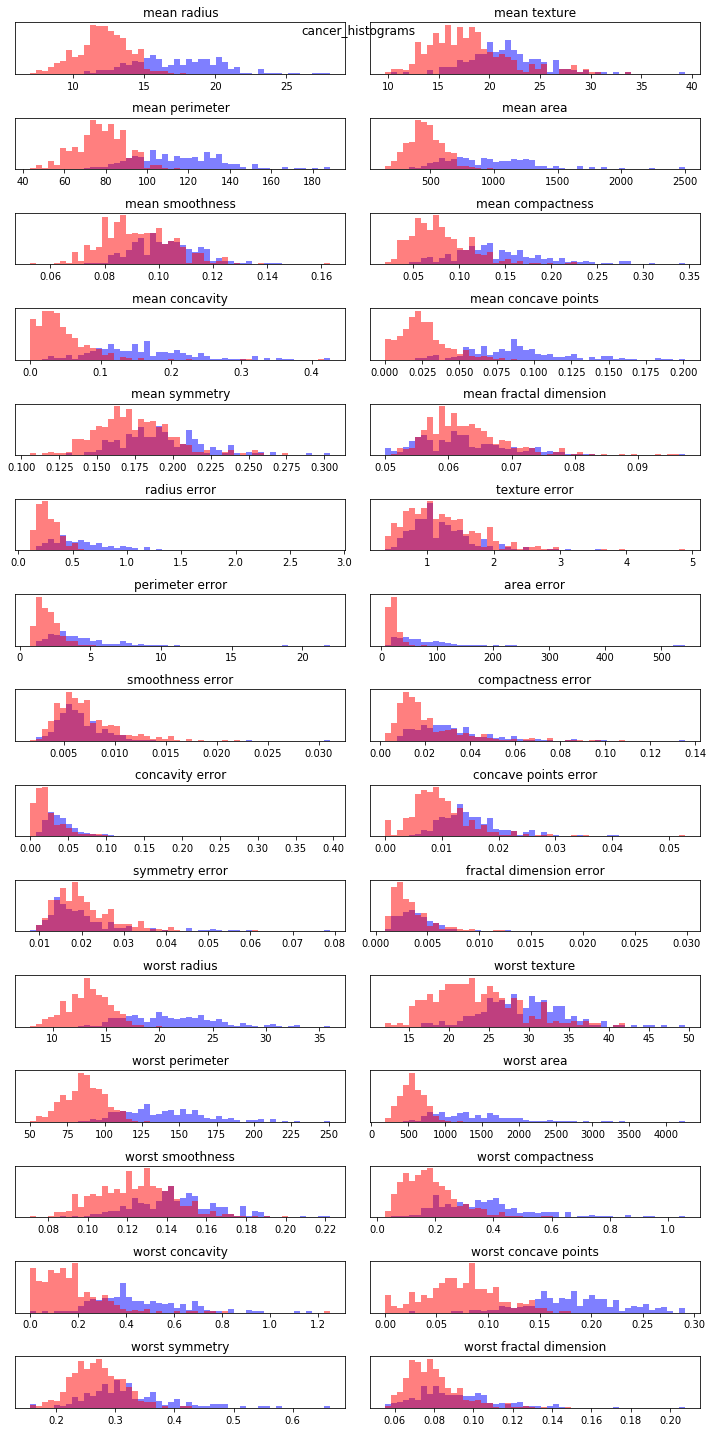

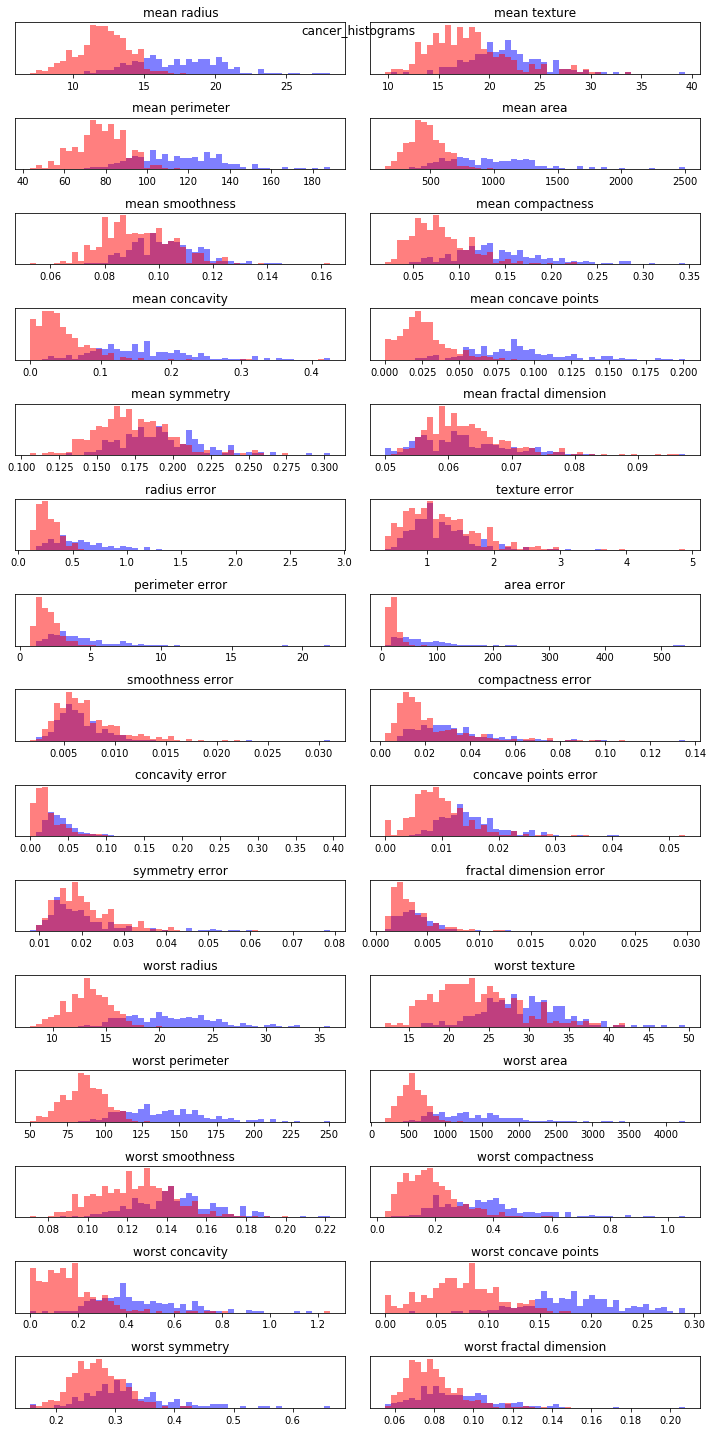

In [13]:
print ("------date scaling-----")
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target,random_state=0)
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
svm.score(X_test_scaled, y_test)
print ("------Principal Component Analysis-----")
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='b', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='r', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
fig.tight_layout()
plt.suptitle("cancer_histograms")
#plt.show()

------Scaling-------
Original shape: (569, 30)
Reduced shape: (569, 2)


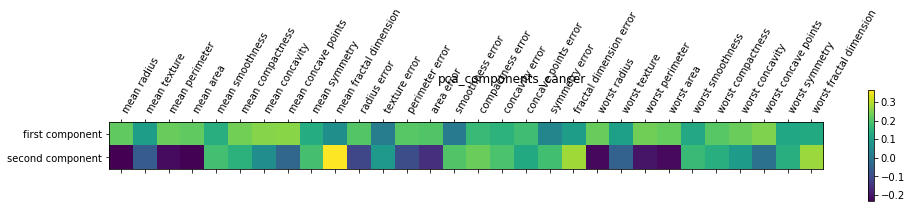

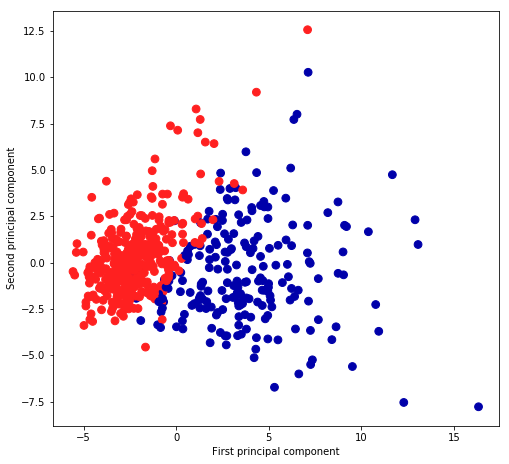

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


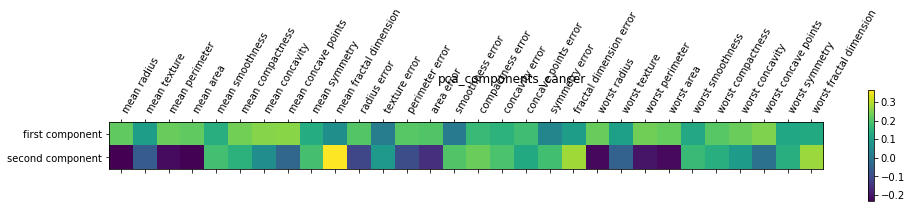

In [13]:
print ("------Scaling-------")
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: %s" % str(X_scaled.shape))
print("Reduced shape: %s" % str(X_pca.shape))

# plot fist vs second principal component, color by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, cmap=mglearn.tools.cm, s=60)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()

pca.components_.shape
print(pca.components_)

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
            cancer.feature_names, rotation=60, ha='left');
plt.suptitle("pca_components_cancer")
plt.show()

In [2]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print (cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        